# Kaggle

https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset

# Importar bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

In [2]:
os.makedirs('Results', exist_ok=True)

In [3]:
TIPO_DE_TRANSFORMACAO = 'standardization' #robust ou min_max

# Configurar o Pandas para exibir todas as colunas

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('./Dados/credit_card_transactions.csv')

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


# Exibir o formato dos dados

In [7]:
df.shape

(1296675, 24)

# Verificar dados nulos

In [8]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

# Remover coluna Unnamed

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


# Balancear os dados

In [11]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [12]:
fraud_index = np.arange(df['is_fraud'].value_counts()[1])
np.random.shuffle(fraud_index)

In [13]:
df_selected_index = df[df['is_fraud'] == 0].iloc[fraud_index].copy()
df_selected_index.reset_index(drop=True, inplace=True)

In [14]:
df = pd.concat([df[df['is_fraud'] == 1], df_selected_index], ignore_index=True)

# Converter as colunas de data de transação e data de nascimento de de String para Timestamp

In [15]:
df['trans_date_trans_time'] = df['trans_date_trans_time'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['dob'] = df['dob'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [16]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,28644.0
1,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,78055.0
2,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,78039.0
3,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,28777.0
4,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,78006.0


# Remover colunas

In [17]:
df.drop(['cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_zipcode'], axis=1, inplace=True)

In [18]:
df.head()

,trans_date_trans_time,category,amt,gender,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-02 01:06:37,grocery_pos,281.06,M,885,Soil scientist,1988-09-15,36.430124,-81.179483,1
1,2019-01-02 01:47:29,gas_transport,11.52,F,1595797,Horticultural consultant,1960-10-28,29.819364,-99.142791,1
2,2019-01-02 03:05:23,grocery_pos,276.31,F,1595797,Horticultural consultant,1960-10-28,29.273085,-98.836360,1
3,2019-01-02 03:38:03,gas_transport,7.03,M,885,Soil scientist,1988-09-15,35.909292,-82.091010,1
4,2019-01-02 03:55:47,grocery_pos,275.73,F,1595797,Horticultural consultant,1960-10-28,29.786426,-98.683410,1


In [19]:
len(df['category'].unique())

14

In [20]:
len(df['job'].unique())

494

# Calcular as idades com base na data de nascimento (dob)

In [21]:
df['age'] = df['dob'].apply(lambda x : round((datetime.today()-x).days/365))

In [22]:
df.head()

,trans_date_trans_time,category,amt,gender,city_pop,job,dob,merch_lat,merch_long,is_fraud,age
0,2019-01-02 01:06:37,grocery_pos,281.06,M,885,Soil scientist,1988-09-15,36.430124,-81.179483,1,36
1,2019-01-02 01:47:29,gas_transport,11.52,F,1595797,Horticultural consultant,1960-10-28,29.819364,-99.142791,1,64
2,2019-01-02 03:05:23,grocery_pos,276.31,F,1595797,Horticultural consultant,1960-10-28,29.273085,-98.836360,1,64
3,2019-01-02 03:38:03,gas_transport,7.03,M,885,Soil scientist,1988-09-15,35.909292,-82.091010,1,36
4,2019-01-02 03:55:47,grocery_pos,275.73,F,1595797,Horticultural consultant,1960-10-28,29.786426,-98.683410,1,64


# Remover as colunas de data

In [23]:
df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [24]:
df.head()

,category,amt,gender,city_pop,job,merch_lat,merch_long,is_fraud,age
0,grocery_pos,281.06,M,885,Soil scientist,36.430124,-81.179483,1,36
1,gas_transport,11.52,F,1595797,Horticultural consultant,29.819364,-99.142791,1,64
2,grocery_pos,276.31,F,1595797,Horticultural consultant,29.273085,-98.836360,1,64
3,gas_transport,7.03,M,885,Soil scientist,35.909292,-82.091010,1,36
4,grocery_pos,275.73,F,1595797,Horticultural consultant,29.786426,-98.683410,1,64


# Transformar as colunas category, job e gender

In [25]:
categorical_columns = pd.get_dummies(df[['category', 'job', 'gender']], drop_first=True, dtype=int)

In [26]:
df.drop(['category', 'job', 'gender'], axis=1, inplace=True)

In [27]:
df = pd.concat([df, categorical_columns], axis=1)

In [28]:
#df.rename(columns={'gender_M':'gender'}, inplace=True)

In [29]:
df.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"job_Doctor, general practice","job_Doctor, hospital",job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Economist,"job_Editor, commissioning","job_Editor, film/video","job_

In [30]:
df.shape

(15012, 513)

# Separar os dados em treino e teste

In [31]:
is_fraud = df['is_fraud'].copy()

In [32]:
X = df.drop('is_fraud', axis=1).copy()
y = df['is_fraud'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=is_fraud)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [33]:
print(f'X treino shape: {X_train.shape}')
print(f'X teste shape: {X_test.shape}')

X treino shape: (10508, 512)
X teste shape: (4504, 512)


In [34]:
print(f'y treino shape: {y_train.shape}')
print(f'y teste shape: {y_test.shape}')

y treino shape: (10508,)
y teste shape: (4504,)


In [35]:
X_train.head()

,amt,city_pop,merch_lat,merch_long,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"job_Doctor, general practice","job_Doctor, hospital",job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Economist,"job_Editor, commissioning","job_Editor, film/video","job_Editor, m

In [36]:
X_test.head()

,amt,city_pop,merch_lat,merch_long,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"job_Doctor, general practice","job_Doctor, hospital",job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Economist,"job_Editor, commissioning","job_Editor, film/video","job_Editor, m

# Aplicar transformações aos dados

In [37]:
if TIPO_DE_TRANSFORMACAO == 'standardization':
    scaler = StandardScaler()
elif TIPO_DE_TRANSFORMACAO == 'min_max':
    scaler = MinMaxScaler()
else:
    scaler = RobustScaler()

In [38]:
remove_columns = list(categorical_columns.columns)

data_train = scaler.fit_transform(X_train.drop(remove_columns, axis=1))
X_train_transformed = pd.DataFrame(data=data_train, columns=X_train.drop(remove_columns, axis=1).columns)
X_train_transformed = pd.concat([X_train_transformed, X_train[remove_columns]], axis=1)

data_test = scaler.transform(X_test.drop(remove_columns, axis=1))
X_test_transformed = pd.DataFrame(data=data_test, columns=X_test.drop(remove_columns, axis=1).columns)
X_test_transformed = pd.concat([X_test_transformed, X_test[remove_columns]], axis=1)

In [39]:
X_train_transformed.head()

,amt,city_pop,merch_lat,merch_long,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"job_Doctor, general practice","job_Doctor, hospital",job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Economist,"job_Editor, commissioning","job_Editor, film/video","job_Editor, m

In [40]:
X_test_transformed.head()

,amt,city_pop,merch_lat,merch_long,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, television/film set","job_Designer, textile","job_Development worker, community","job_Development worker, international aid",job_Diagnostic radiographer,job_Dispensing optician,"job_Doctor, general practice","job_Doctor, hospital",job_Drilling engineer,job_Early years teacher,job_Ecologist,job_Economist,"job_Editor, commissioning","job_Editor, film/video","job_Editor, m

In [41]:
print(f'X treino shape: {X_train_transformed.shape}')
print(f'X teste shape: {X_test_transformed.shape}')

X treino shape: (10508, 512)
X teste shape: (4504, 512)


# Ajustar o modelo de Regressão Logística

In [42]:
model = LogisticRegression(random_state=0)
model.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

# Avaliar os resultados

In [43]:
y_pred = model.predict(X_test_transformed)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

<Figure size 1600x1000 with 0 Axes>

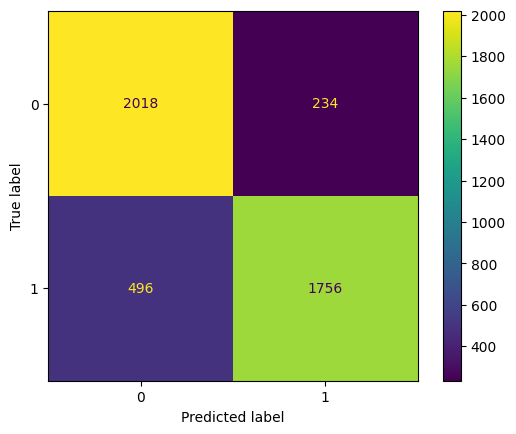

In [44]:
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(16, 10))
display_cm.plot()
plt.savefig('./Results/ConfusionMatrix.png')

<Figure size 1600x1000 with 0 Axes>

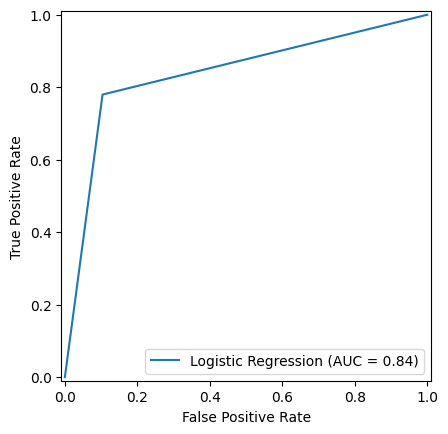

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display_roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
plt.figure(figsize=(16, 10))
display_roc.plot()
plt.savefig('./Results/ROC.png')

# Imprimir os resultados

In [46]:
print('##### MATRIZ DE CONFUSÃO #####')
print(cm)
print('\n')

print('##### RELATÓRIO DE CLASSIFICAÇÃO #####')
print(classification_report(y_test, y_pred))
print('\n')

print('##### ACCURACY #####')
print(f'{np.round(accuracy_score(y_test, y_pred),4)*100}%')
print('\n')

##### MATRIZ DE CONFUSÃO #####
[[2018  234]
 [ 496 1756]]


##### RELATÓRIO DE CLASSIFICAÇÃO #####
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      2252
           1       0.88      0.78      0.83      2252

    accuracy                           0.84      4504
   macro avg       0.84      0.84      0.84      4504
weighted avg       0.84      0.84      0.84      4504



##### ACCURACY #####
83.78999999999999%


